In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#read in the three datasets
#NYbestlist is the NY times best seller list
#weeks_on_list is the number of weeks a book was on the best seller list
NYbestlist_df = pd.read_csv("Resources/books_uniq_weeks.csv",encoding = 'unicode_escape')
NYbestlist_df['date'] = pd.to_datetime(NYbestlist_df['date'])
NYbestlist_df['year'] = NYbestlist_df['date'].dt.year
NYbestlist_df['month'] = NYbestlist_df['date'].dt.month
NYbestlist_df.head()


,publisher,author,primary_isbn10,primary_isbn13,date,contributor,title,weeks_on_list,year,month
0,Riverhead,Paula Hawkins,1594634025,9.78E+12,2017-02-19,by Paula Hawkins,THE GIRL ON THE TRAIN,102,2017,2
1,Scribner,Anthony Doerr,1501173219,9.78E+12,2017-05-07,by Anthony Doerr,ALL THE LIGHT WE CANNOT SEE,81,2017,5
2,Vintage,E L James,525431888,9.78E+12,2017-03-05,by E. L. James,FIFTY SHADES DARKER,66,2017,3
3,St. Martin's,Kristin Hannah,1466850604,9.78E+12,2017-10-29,by Kristin Hannah,THE NIGHTINGALE,63,2017,10
4,Penguin Group,Kathryn Stockett,1440697663,9.78E+12,2012-04-08,by Kathryn Stockett,THE HELP,58,2012,4


In [4]:
#goodreads is the Goodreads dataset
#rating of 5 
goodreads_df = pd.read_csv('Resources/books.csv',error_bad_lines=False)
goodreads_df.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [7]:
goodreads_df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [ ]:
#top100 is the top 100 books from 1998-2010
#Volume is how many books were sold which is a great thing to potentially track
#Nielsen records 1998-2010
top100_df = pd.read_csv('Resources/Top 100 books - TOP 100 - ALL TIME.csv')

#convert values from pounds to dollars
#remove pound sign
top100_df["Value"] = [x.strip('£') for x in top100_df["Value"]]
top100_df["RRP"] = [x.strip('£') for x in top100_df["RRP"]]
top100_df["ASP"] = [x.strip('£') for x in top100_df["ASP"]]
#convert str to float
top100_df["Value"] = [float(x.replace(',','')) for x in top100_df["Value"]]
top100_df["Value"] = pd.to_numeric(top100_df["Value"])
top100_df["RRP"] = pd.to_numeric(top100_df["RRP"])
top100_df["ASP"] = pd.to_numeric(top100_df["ASP"])
#convert to dollars
top100_df["Value"] = [x*1.22 for x in top100_df["Value"]]
top100_df["RRP"] = [x*1.22 for x in top100_df["RRP"]]
top100_df["ASP"] = [x*1.22 for x in top100_df["ASP"]]

#extract months and year
top100_df["Publ Date"] = pd.to_datetime(top100_df['Publ Date'])
top100_df['year'] = top100_df['Publ Date'].dt.year
top100_df['month'] = top100_df['Publ Date'].dt.month
top100_df.head()

In [8]:
# authors with best ratings
# books with best ratings
# ratings/ review count
# average rating
# number of pages

goodreads_data = goodreads_df.rename(columns={"authors":"Author", "title":"Book Title", "average_rating": "Average Rating", "# num_pages": "Book Pages", "ratings_count": "Ratings Count"})


# authors with best ratings
good_reads_data = goodreads_data[["Author", "Book Title", "Average Rating", "Ratings Count", "Book Pages"]]
   
good_reads_data.sort_values(["Average Rating", "Book Title"], axis=0, 
                 ascending=False, inplace=True)
good_reads_data.head(10)

,Author,Book Title,Average Rating,Ratings Count,Book Pages
4939,Tim Bogenn,Zone of the Enders: The 2nd Runner Official St...,5.0,2,128
6788,Dennis Adler-R.L. Wilson,Winchester Shotguns,5.0,2,372
879,Julie Sylvester-David Sylvester,Willem de Kooning: Late Paintings,5.0,1,83
11069,Laura Driscoll-Alisa Klayman-Grodsky-Eric ...,Tyrannosaurus Wrecks (Stanley #1),5.0,2,24
7506,Todd Davis-Marc Frey,The New Big Book of America,5.0,2,56
11542,Keith Donohue,The Irish Anatomist: A Study of Flann O'Brien,5.0,1,222
6745,NOT A BOOK,The Goon Show Volume 5: And There's More Wher...,5.0,0,2
6596,NOT A BOOK,The Goon Show Volume 4: My Knees Have Fallen ...,5.0,3,2
6598,NOT A BOOK,The Goon Show Volume 11: He's Fallen in the W...,5.0,2,2
5786,John Diamond,The Diamond Color Meditation: Color Path to th...,5.0,5,74


In [9]:
# count total number of authors 
author_count = goodreads_df["authors"].value_counts()
author_count.count()


7600

In [10]:
# Average rating
avg_rating = good_reads_data["Average Rating"].mean()
avg_rating

3.9306198045792136

In [11]:
# Average number of pages
pages_data = good_reads_data["Book Pages"].mean()
pages_data

342.4027271401487

In [12]:
# ratings count
ratings = good_reads_data["Ratings Count"].value_counts()
ratings.head(10)

3    116
2    115
0    114
1    114
4    113
5     91
9     85
6     80
7     78
8     77
Name: Ratings Count, dtype: int64

In [13]:
avgreviews = good_reads_data["Ratings Count"].mean()
avgreviews

17765.397258276214

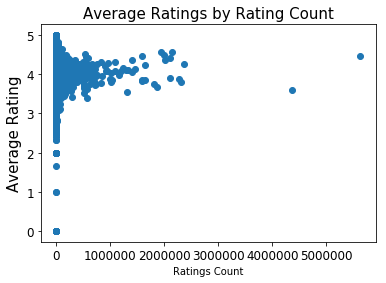

In [32]:
y = good_reads_data['Average Rating']; 
x = good_reads_data['Ratings Count']

plt.xlabel('Ratings Count'); plt.ylabel('Average Rating', fontsize=15)
plt.xticks(size = 12); plt.yticks(size = 12)
plt.title("Average Ratings by Rating Count", size = 15)                                
plt.scatter(x,y)
plt.savefig('graphs/Averageratingbyratingcount.png')

(array([10373.,   986.,   509.,   284.,   222.,   164.,   110.,   102.,
           70.,    71.]),
 array([    0. ,  4994.6,  9989.2, 14983.8, 19978.4, 24973. , 29967.6,
        34962.2, 39956.8, 44951.4, 49946. ]),
 <a list of 10 Patch objects>)

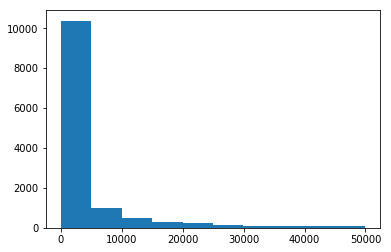

In [15]:
cond = good_reads_data["Ratings Count"] < 50000
lessthan1000 = good_reads_data[cond]
rating1000 = lessthan1000["Ratings Count"]
plt.hist(rating1000)

(array([7655., 1203.,  709.,  459.,  349.,  277.,  211.,  172.,  173.,
         152.]),
 array([   0. ,  999.6, 1999.2, 2998.8, 3998.4, 4998. , 5997.6, 6997.2,
        7996.8, 8996.4, 9996. ]),
 <a list of 10 Patch objects>)

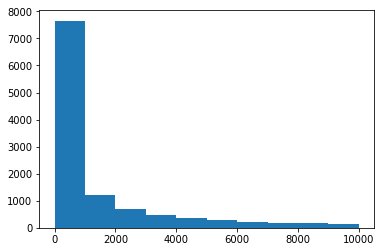

In [16]:
cond = good_reads_data["Ratings Count"] < 10000
lessthan10000 = good_reads_data[cond]
rating10000 = lessthan10000["Ratings Count"]
plt.hist(rating10000)

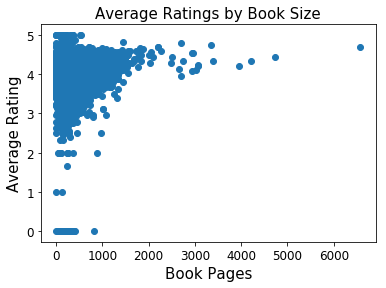

In [33]:
y = good_reads_data['Average Rating']; 
x = good_reads_data['Book Pages']

plt.xlabel('Book Pages', fontsize = 15); plt.ylabel('Average Rating', fontsize = 15)
plt.xticks(size = 12); plt.yticks(size = 12)
plt.title("Average Ratings by Book Size",size=15)  
plt.scatter(x,y)
plt.savefig("graphs/Averageratingby_booksize.png")

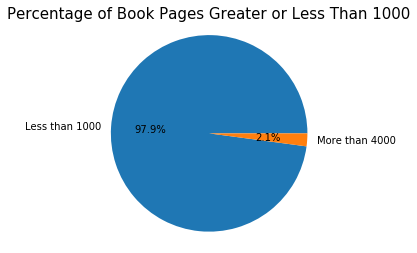

In [34]:
bins = [0, 999,9999]
labels = ["Less than 1000", "More than 4000"]
bookpages = pd.cut(good_reads_data["Book Pages"],bins,labels=labels).value_counts().to_dict()
bookpages_label = bookpages.keys()
bookpages_num = bookpages.values()
plt.pie(bookpages_num,labels=bookpages_label,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Percentage of Book Pages Greater or Less Than 1000", size=15)
plt.savefig("graphs/Bookpagespercent.png")

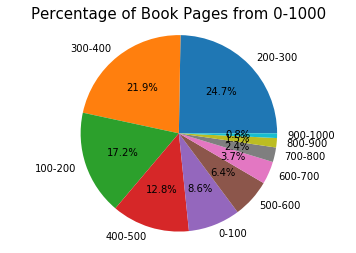

In [35]:
bins = [0, 99,199,299,399,499,599,699,799,899,999]
labels = ["0-100", "100-200","200-300","300-400","400-500","500-600","600-700","700-800","800-900","900-1000",]
bookpages = pd.cut(good_reads_data["Book Pages"],bins,labels=labels).value_counts().to_dict()
bookpages_label = bookpages.keys()
bookpages_num = bookpages.values()
plt.pie(bookpages_num,labels=bookpages_label,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Percentage of Book Pages from 0-1000", size = 15)
plt.savefig("graphs/Bookpagebreakdown.png")